In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go
sns.set_style('darkgrid')
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20,5)

# Preparing the CSV files

In [2]:
import os
import glob

def get_csv_filenames():
    # Get the current working directory
    current_dir = os.getcwd()

    # Use glob to find all CSV files in the current working directory
    csv_files = glob.glob(os.path.join(current_dir, '*.csv'))
    
    # Extract only the filenames from the file paths
    csv_filenames = [os.path.basename(file) for file in csv_files]

    return csv_filenames

csv_filenames = get_csv_filenames()

if csv_filenames:
    print("CSV files found in the folder:")
    for filename in csv_filenames:
        print(filename)
else:
    print("No CSV files found in the folder.")

CSV files found in the folder:
Combined_S&P_500.csv
Consolidated_Data.csv
EMPLOY_CPI.csv
FEDFUNDS.csv
GDP.csv
MORTGAGE30US.csv
T10Y2Y.csv
T10Y3M.csv


In [3]:
# Define the list of CSV files
csv_files = [
    'T10Y2Y.csv',
    'T10Y3M.csv'
]

# Function to display info for each CSV file, handle non-numeric values, and convert to float64
def display_info_and_convert_float_with_NaN(file_name):
    if os.path.exists(file_name):
        print(f"Info for {file_name}:")
        data = pd.read_csv(file_name)
        print(data.info())
        print("------------------------------------")

        # Handling non-numeric values and converting to float64
        if file_name == 'T10Y2Y.csv':
            data['T10Y2Y'] = pd.to_numeric(data['T10Y2Y'], errors='coerce')
        elif file_name == 'T10Y3M.csv':
            data['DGS10_DTB3'] = pd.to_numeric(data['DGS10_DTB3'], errors='coerce')

        # Save the modified data back to the CSV file
        data.to_csv(file_name, index=False)
        print(f"Converted '{file_name}' column to float64 and replaced non-numeric values with NaN.")
    else:
        print(f"{file_name} does not exist.")

# Iterate through each CSV file and handle non-numeric values, then convert to float64
for file in csv_files:
    display_info_and_convert_float_with_NaN(file)

Info for T10Y2Y.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12416 entries, 0 to 12415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    12416 non-null  object 
 1   T10Y2Y  11894 non-null  float64
dtypes: float64(1), object(1)
memory usage: 194.1+ KB
None
------------------------------------
Converted 'T10Y2Y.csv' column to float64 and replaced non-numeric values with NaN.
Info for T10Y3M.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16174 entries, 0 to 16173
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        16174 non-null  object 
 1   DGS10_DTB3  15485 non-null  float64
dtypes: float64(1), object(1)
memory usage: 252.8+ KB
None
------------------------------------
Converted 'T10Y3M.csv' column to float64 and replaced non-numeric values with NaN.


In [4]:
# Define the list of CSV files
csv_files = [
    'Combined_S&P_500.csv',
    'EMPLOY_CPI.csv',
    'FEDFUNDS.csv',
    'GDP.csv',
    'MORTGAGE30US.csv',
    'T10Y2Y.csv',
    'T10Y3M.csv'
]

# Function to display info for each CSV file and convert 'DATE' column to datetime
def display_info_and_convert_date(file_name):
    if os.path.exists(file_name):
        print(f"Info for {file_name}:")
        data = pd.read_csv(file_name)

        # Convert 'DATE' column to datetime
        data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

        # Check the data types after conversion
        print(data.info())
        print("------------------------------------")

        # Save the modified data back to the CSV file
        data.to_csv(file_name, index=False)
        print(f"Converted 'DATE' column to datetime and saved in {file_name}.")
        print("------------------------------------")
    else:
        print(f"{file_name} does not exist.")

# Iterate through each CSV file and convert 'DATE' column to datetime
for file in csv_files:
    display_info_and_convert_date(file)

Info for Combined_S&P_500.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11102 entries, 0 to 11101
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    11102 non-null  datetime64[ns]
 1   Price   11102 non-null  float64       
 2   Change  11102 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 260.3 KB
None
------------------------------------
Converted 'DATE' column to datetime and saved in Combined_S&P_500.csv.
------------------------------------
Info for EMPLOY_CPI.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          911 non-null    datetime64[ns]
 1   UNRATE        911 non-null    float64       
 2   CPIAUCSL_PC1  911 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage:

In [5]:
# List of CSV files
csv_files = [
    'Combined_S&P_500.csv',
    'EMPLOY_CPI.csv',
    'FEDFUNDS.csv',
    'GDP.csv',
    'MORTGAGE30US.csv',
    'T10Y2Y.csv',
    'T10Y3M.csv'
]

# Function to display info for each CSV file
def display_info(file_name):
    if os.path.exists(file_name):
        print(f"Info for {file_name}:")
        data = pd.read_csv(file_name)
        print("Number of rows:", len(data))
        print("Columns:", data.columns.tolist())
        print("Sample data:")
        print(data.info())
        print("------------------------------------")
    else:
        print(f"{file_name} does not exist.")

# Iterate through each CSV file and display information
for file in csv_files:
    display_info(file)

Info for Combined_S&P_500.csv:
Number of rows: 11102
Columns: ['DATE', 'Price', 'Change']
Sample data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11102 entries, 0 to 11101
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    11102 non-null  object 
 1   Price   11102 non-null  float64
 2   Change  11102 non-null  float64
dtypes: float64(2), object(1)
memory usage: 260.3+ KB
None
------------------------------------
Info for EMPLOY_CPI.csv:
Number of rows: 911
Columns: ['DATE', 'UNRATE', 'CPIAUCSL_PC1']
Sample data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          911 non-null    object 
 1   UNRATE        911 non-null    float64
 2   CPIAUCSL_PC1  911 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.5+ KB
None
-----------------------------

In [6]:
# Define the list of CSV files
csv_files = [
    'Combined_S&P_500.csv',
    'EMPLOY_CPI.csv',
    'FEDFUNDS.csv',
    'GDP.csv',
    'MORTGAGE30US.csv',
    'T10Y2Y.csv',
    'T10Y3M.csv'
]

# Read the first CSV file to initiate the DataFrame
merged_data = pd.read_csv(csv_files[0])

# Iterate over the rest of the CSV files and perform a left join on the 'DATE' column
for file in csv_files[1:]:
    if os.path.exists(file):
        data = pd.read_csv(file)
        merged_data = pd.merge(merged_data, data, on='DATE', how='left')

# Group by 'DATE' column and aggregate columns with non-NA values
merged_data = merged_data.groupby('DATE').agg(lambda x: x.dropna().iloc[0] if x.notnull().any() else pd.NA).reset_index()

# Save the merged data to a new CSV file
merged_data.to_csv('Consolidated_Data.csv', index=False)

print("CSV files have been successfully joined and consolidated into 'Consolidated_Data.csv'.")

CSV files have been successfully joined and consolidated into 'Consolidated_Data.csv'.


# Cleaning the Data

In [7]:
df = pd.read_csv('Consolidated_Data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11102 entries, 0 to 11101
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             11102 non-null  object 
 1   Price            11102 non-null  float64
 2   Change           11102 non-null  float64
 3   UNRATE           338 non-null    float64
 4   CPIAUCSL_PC1     338 non-null    float64
 5   FEDFUNDS         339 non-null    float64
 6   A191RL1Q225SBEA  93 non-null     float64
 7   MORTGAGE30US     2255 non-null   float64
 8   T10Y2Y           10994 non-null  float64
 9   DGS10_DTB3       10993 non-null  float64
dtypes: float64(9), object(1)
memory usage: 867.5+ KB


In [9]:
# Read the CSV file into a DataFrame
# Assuming df is your DataFrame containing the combined and consolidated data
df = pd.read_csv('Consolidated_Data.csv')

# Rename columns in the original DataFrame
df.rename(columns={
    'CPIAUCSL_PC1': 'CPI',
    'A191RL1Q225SBEA': 'GDP',
    'DGS10_DTB3': 'T10Y3M'
}, inplace=True)

# Display the updated column names
print(df.columns)

Index(['DATE', 'Price', 'Change', 'UNRATE', 'CPI', 'FEDFUNDS', 'GDP',
       'MORTGAGE30US', 'T10Y2Y', 'T10Y3M'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11102 entries, 0 to 11101
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          11102 non-null  object 
 1   Price         11102 non-null  float64
 2   Change        11102 non-null  float64
 3   UNRATE        338 non-null    float64
 4   CPI           338 non-null    float64
 5   FEDFUNDS      339 non-null    float64
 6   GDP           93 non-null     float64
 7   MORTGAGE30US  2255 non-null   float64
 8   T10Y2Y        10994 non-null  float64
 9   T10Y3M        10993 non-null  float64
dtypes: float64(9), object(1)
memory usage: 867.5+ KB


In [11]:
# Assuming 'df' is your DataFrame with a 'DATE' column and a 'UNRATE' column

# Convert 'DATE' column to datetime format if it's not already in datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Sort the DataFrame by the 'DATE' column to ensure it's in chronological order
df = df.sort_values('DATE')

# Forward-fill missing values in the 'UNRATE' column
df['UNRATE'] = df['UNRATE'].fillna(method='ffill')

In [12]:
# Forward fill missing values in the DataFrame 'df'
df = df.fillna(method='ffill')

# Display the DataFrame after filling missing values
df

DATE    Price  Change  UNRATE       CPI  FEDFUNDS  GDP  \
0     1979-12-26   107.80  0.0009     NaN       NaN       NaN  NaN   
1     1979-12-27   108.00  0.0019     NaN       NaN       NaN  NaN   
2     1979-12-28   107.80 -0.0019     NaN       NaN       NaN  NaN   
3     1979-12-31   107.90  0.0009     NaN       NaN       NaN  NaN   
4     1980-01-01   107.90  0.0000     6.3  13.86861     13.82  1.3   
...          ...      ...     ...     ...       ...       ...  ...   
11097 2023-12-27  4781.58  0.0014     3.7   3.12092      5.33  2.7   
11098 2023-12-28  4783.35  0.0004     3.7   3.12092      5.33  2.7   
11099 2023-12-29  4769.83 -0.0028     3.7   3.12092      5.33  2.7   
11100 2024-01-02  4742.83 -0.0057     3.7   3.12092      5.33  2.7   
11101 2024-01-03  4704.81 -0.0080     3.7   3.12092      5.33  2.7   

       MORTGAGE30US  T10Y2Y  T10Y3M  
0               NaN   -0.95   -1.52  
1               NaN   -0.93   -1.51  
2             12.90   -0.89   -1.51  
3             12.90   -0.90   -1.71  
4             12.90   -0.90   -1.71  
...             ...     ...     ...  
11097          6.67   -0.41   -1.45  
11098          6.61   -0.42   -1.41  
11099          6.61   -0.35   -1.32  
11100          6.61   -0.38   -1.32  
11101          6.61   -0.38   -1.32  

[11102 rows x 10 columns]

In [13]:
# Assuming 'df' is your DataFrame
null_count_per_column = df.isnull().sum()
print("Number of null values in each column:")
print(null_count_per_column)

Number of null values in each column:
DATE            0
Price           0
Change          0
UNRATE          4
CPI             4
FEDFUNDS        4
GDP             4
MORTGAGE30US    2
T10Y2Y          0
T10Y3M          0
dtype: int64


In [14]:
# Export the DataFrame to an Excel file
df.to_excel('full_data.xlsx', index=False)

# Analyzing the Data

## <span style="color: green;">Correlation between Variables (All-Time)</span>

<Figure size 1400x800 with 0 Axes>

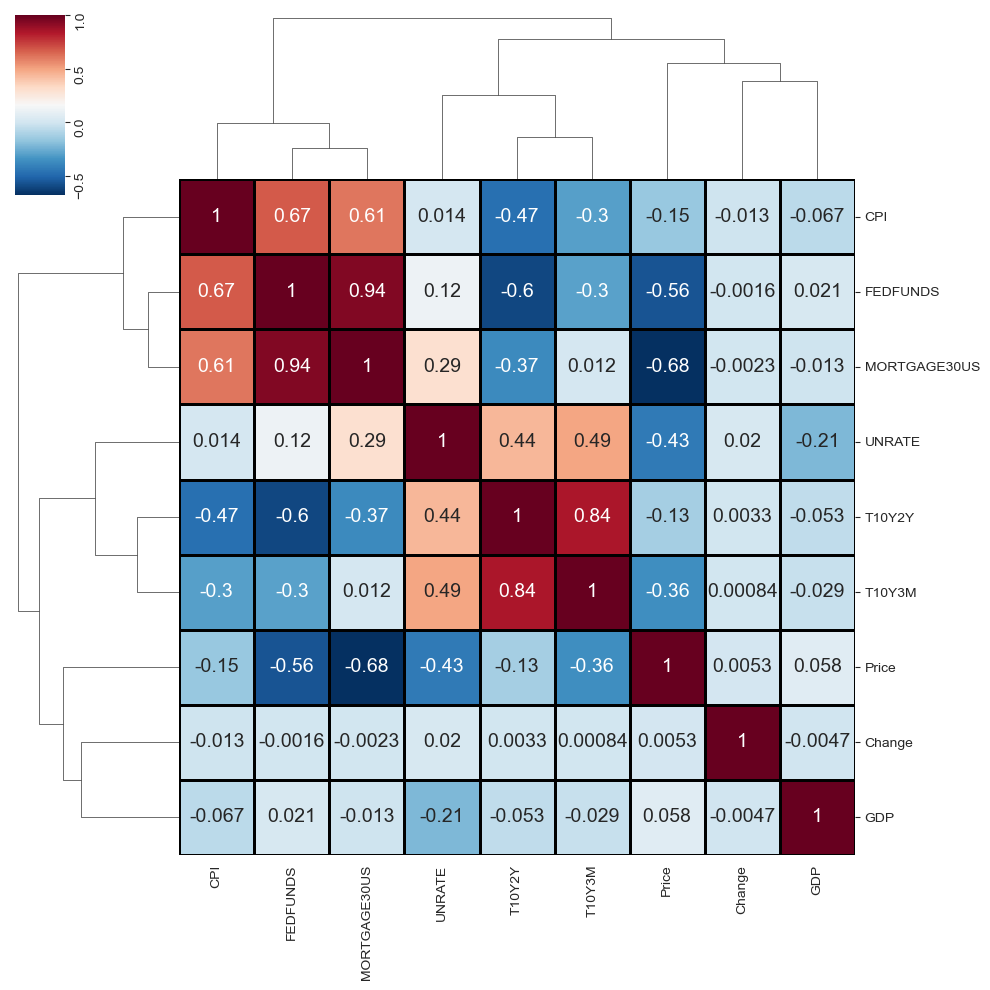

In [15]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))## <span style="color: green;">Correlation between Variables (Last 9 Years)</span>

# Generate the heatmap with correlation values and annotations
sns.clustermap(corr_matrix, annot=True, annot_kws={"fontsize": 14}, linecolor='black', linewidths=1, cmap='RdBu_r')

# Rotate the x-axis tick labels for better readability
plt.yticks(rotation=90)

plt.show()

In [16]:
# Assuming 'df' is your DataFrame
column_list = df.columns.tolist()
print(column_list)

['DATE', 'Price', 'Change', 'UNRATE', 'CPI', 'FEDFUNDS', 'GDP', 'MORTGAGE30US', 'T10Y2Y', 'T10Y3M']


In [17]:
# Assuming 'df' is your DataFrame

# Step 1: Create independent and dependent variables DataFrames
independent_variables = df[['UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M']]
dependent_variable = df['Price']

# Step 2: Drop rows with missing values in any of the columns used for regression
df_reg = pd.concat([independent_variables, dependent_variable], axis=1).dropna()

# Extract independent and dependent variables after dropping missing values
independent_variables = df_reg[['UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M']]
dependent_variable = df_reg['Price']

# Step 3: Add a constant to the independent variables DataFrame
independent_variables = sm.add_constant(independent_variables)

# Step 4: Fit the OLS regression model
regression_model = sm.OLS(dependent_variable, independent_variables).fit()

# Step 5: Print the regression statistics
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     5663.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:11:27   Log-Likelihood:                -86645.
No. Observations:               11098   AIC:                         1.733e+05
Df Residuals:                   11092   BIC:                         1.733e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3026.3857     21.212    142.675      0.0

In [18]:
# Predict values using the regression model
predicted_values = regression_model.predict()

# Create a DataFrame containing predicted and actual values
data = {'Predicted': predicted_values, 'Actual': dependent_variable}
scatter_df = pd.DataFrame(data)

# Create a scatter plot using Plotly
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(x=scatter_df['Predicted'], y=scatter_df['Actual'], mode='markers', name='Scatter Plot'))

# Add 45-degree line
fig.add_trace(go.Scatter(x=scatter_df['Actual'], y=scatter_df['Actual'], mode='lines', name='45-degree line'))

# Update layout for better visualization
fig.update_traces(marker=dict(size=5, opacity=0.5))  # Adjust marker size and opacity
fig.update_layout(title='Predicted vs. Actual Values', xaxis_title='Predicted values', yaxis_title='Actual values')

# Show interactive plot
fig.show()

In [19]:
# Define the regression results as a dictionary
regression_results = {
    'Variable': ['const', 'UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M'],
    'Coefficient': [3029.5859, 11.5426, 159.9965, -341.6548, -805.3855, -69.9965],
    'Std Err': [117.248, 21.373, 16.988, 14.759, 98.166, 55.569],
    't-value': [25.839, 0.540, 9.418, -23.149, -8.204, -1.260],
    'P>|t|': [0.000, 0.590, 0.000, 0.000, 0.000, 0.209]
}

# Create a DataFrame from the dictionary
regression_df = pd.DataFrame(regression_results)

# Export the DataFrame to an Excel file
regression_df.to_excel('regression_results.xlsx', index=False)

## <span style="color: green;">Correlation between Variables (Last 9 Years)</span>

<Figure size 1400x800 with 0 Axes>

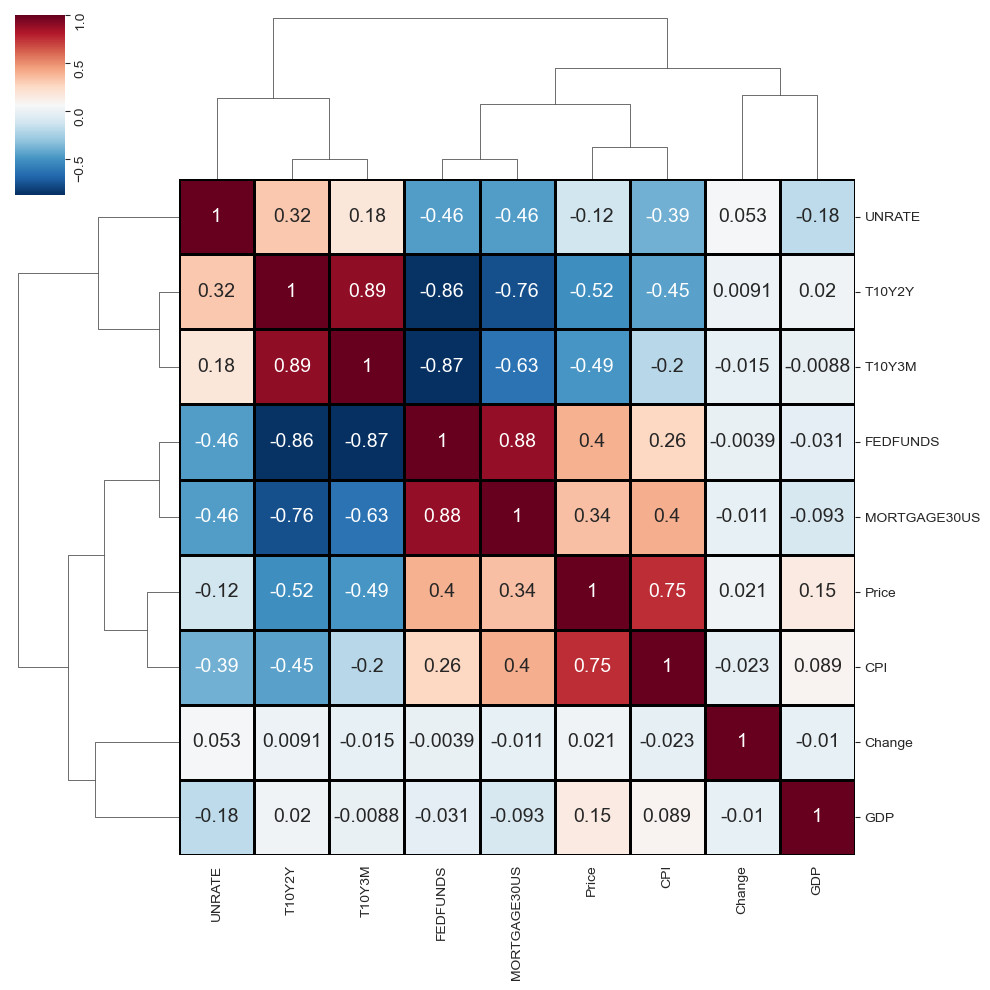

In [20]:
# Assuming 'df' is your DataFrame

# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter the DataFrame to include data from the last 9 years from today's date
current_date = pd.to_datetime('today')
start_date = current_date - pd.DateOffset(years=9)
filtered_df = df[df['DATE'] >= start_date]

# Select only the numeric columns for correlation from the filtered DataFrame
numeric_df = filtered_df.select_dtypes(include='number')

# Generate the correlation matrix based on the filtered data
corr_matrix = numeric_df.corr()

# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))

# Generate the heatmap with correlation values and annotations
sns.clustermap(corr_matrix, annot=True, annot_kws={"fontsize": 14}, linecolor='black', linewidths=1, cmap='RdBu_r')

# Rotate the x-axis tick labels for better readability
plt.yticks(rotation=90)

plt.show()

In [21]:
# Assuming 'df' is your DataFrame

# Step 1: Create independent and dependent variables DataFrames
independent_variables_0 = numeric_df[['UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M']]
dependent_variable_0 = numeric_df['Price']

# Step 2: Drop rows with missing values in any of the columns used for regression
df_reg = pd.concat([independent_variables_0, dependent_variable_0], axis=1).dropna()

# Extract independent and dependent variables after dropping missing values
independent_variables_0 = df_reg[['UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M']]
dependent_variable_0 = df_reg['Price']

# Step 3: Add a constant to the independent variables DataFrame
independent_variables_0 = sm.add_constant(independent_variables_0)

# Step 4: Fit the OLS regression model
regression_model_0 = sm.OLS(dependent_variable_0, independent_variables_0).fit()

# Step 5: Print the regression statistics
print(regression_model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1887.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:11:28   Log-Likelihood:                -16623.
No. Observations:                2257   AIC:                         3.326e+04
Df Residuals:                    2251   BIC:                         3.329e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1830.7146     65.933     27.766      0.0

In [22]:
import plotly.graph_objs as go

# Predict values using the regression model
predicted_values_0 = regression_model_0.predict()

# Create a DataFrame containing predicted and actual values
data = {'Predicted': predicted_values_0, 'Actual': dependent_variable_0}
scatter_df_0 = pd.DataFrame(data)

# Create a scatter plot using Plotly
fig_0 = go.Figure()

# Add scatter plot
fig_0.add_trace(go.Scatter(x=scatter_df_0['Predicted'], y=scatter_df_0['Actual'], mode='markers', name='Scatter Plot'))

# Add 45-degree line
fig_0.add_trace(go.Scatter(x=scatter_df_0['Actual'], y=scatter_df_0['Actual'], mode='lines', name='45-degree line'))

# Update layout for better visualization
fig_0.update_traces(marker=dict(size=5, opacity=0.5))  # Adjust marker size and opacity
fig_0.update_layout(title='Predicted vs. Actual Values', xaxis_title='Predicted values', yaxis_title='Actual values')

# Show interactive plot
fig_0.show()

In [23]:
# Define the regression results as a dictionary
regression_results_0 = {
    'Variable': ['const', 'UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M'],
    'Coefficient': [1832.7808, 96.4464, 356.0153, 17.6356, 1000.1452, -887.1974],
    'Std Err': [65.869, 6.106, 4.596, 14.480, 36.807, 25.576],
    't-value': [27.825, 15.795, 77.468, 1.218, 27.173, -34.688],
    'P>|t|': [0.000, 0.000, 0.000, 0.223, 0.000, 0.000]
}

# Create a DataFrame from the dictionary
regression_df_0 = pd.DataFrame(regression_results_0)

# Export the DataFrame to an Excel file
regression_df_0.to_excel('regression_results_9_years.xlsx', index=False)

## <span style="color: red;">Recession Dates</span>

In [24]:
dates_df = pd.read_csv(r'New Folder/recession_dates.csv')
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Start Dates  6 non-null      object
 1   End Dates    6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes


In [25]:
# Convert 'Start Dates' and 'End Dates' columns to datetime
dates_df['Start Dates'] = pd.to_datetime(dates_df['Start Dates'])
dates_df['End Dates'] = pd.to_datetime(dates_df['End Dates'])

# Check the updated data types
print(dates_df.dtypes)

Start Dates    datetime64[ns]
End Dates      datetime64[ns]
dtype: object


In [26]:
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Start Dates  6 non-null      datetime64[ns]
 1   End Dates    6 non-null      datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 228.0 bytes


## <span style="color: red;">Correlation between Variables (Recession Periods)</span>

<Figure size 1400x800 with 0 Axes>

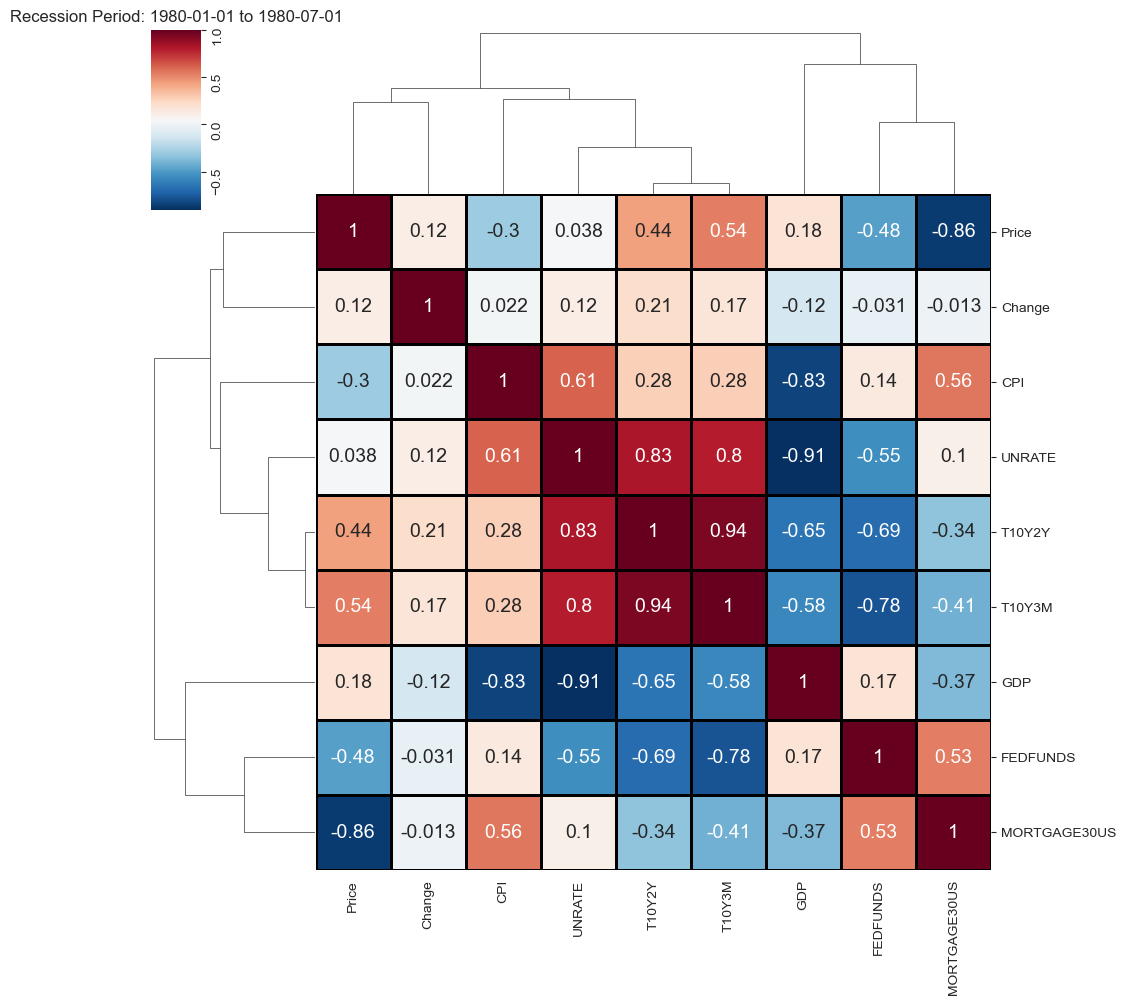

<Figure size 1400x800 with 0 Axes>

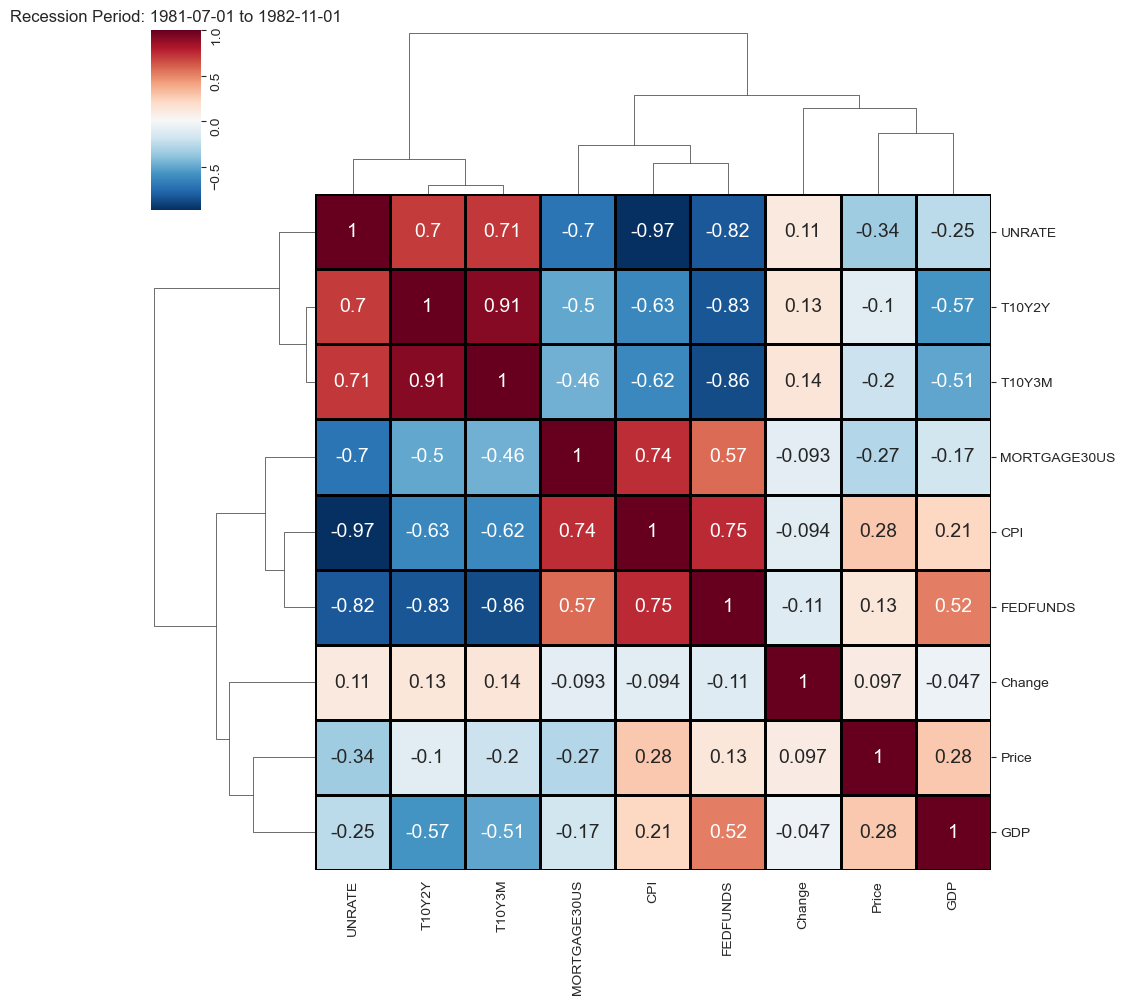

<Figure size 1400x800 with 0 Axes>

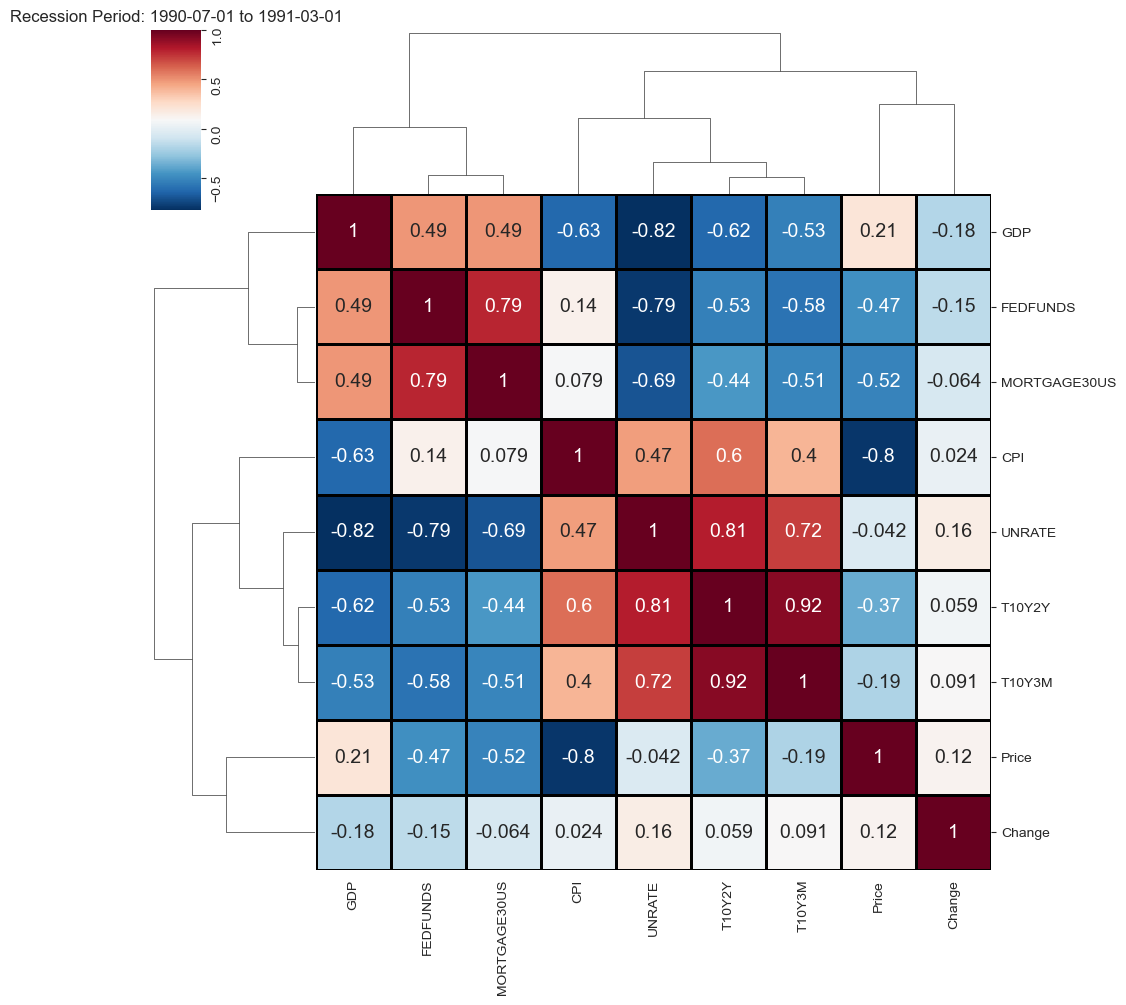

<Figure size 1400x800 with 0 Axes>

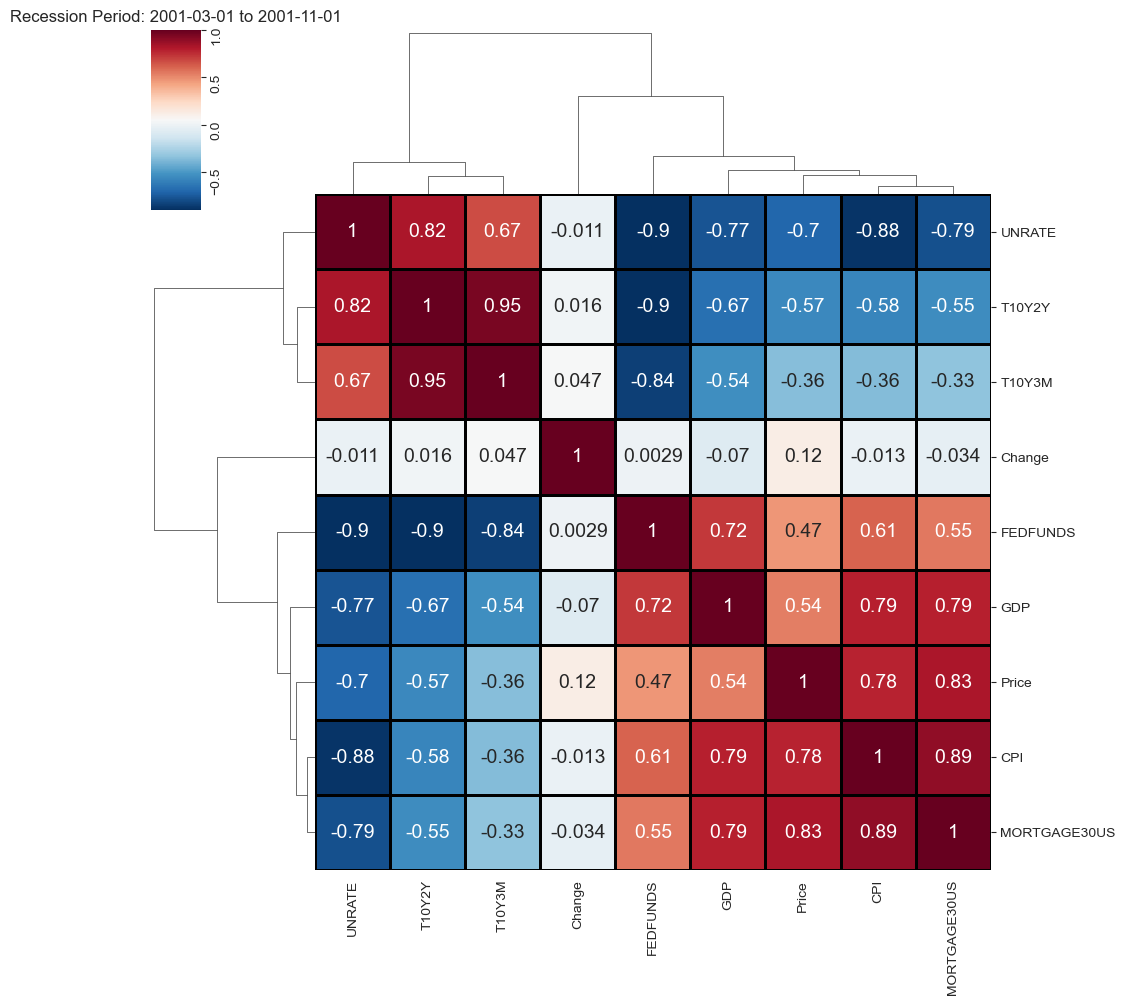

<Figure size 1400x800 with 0 Axes>

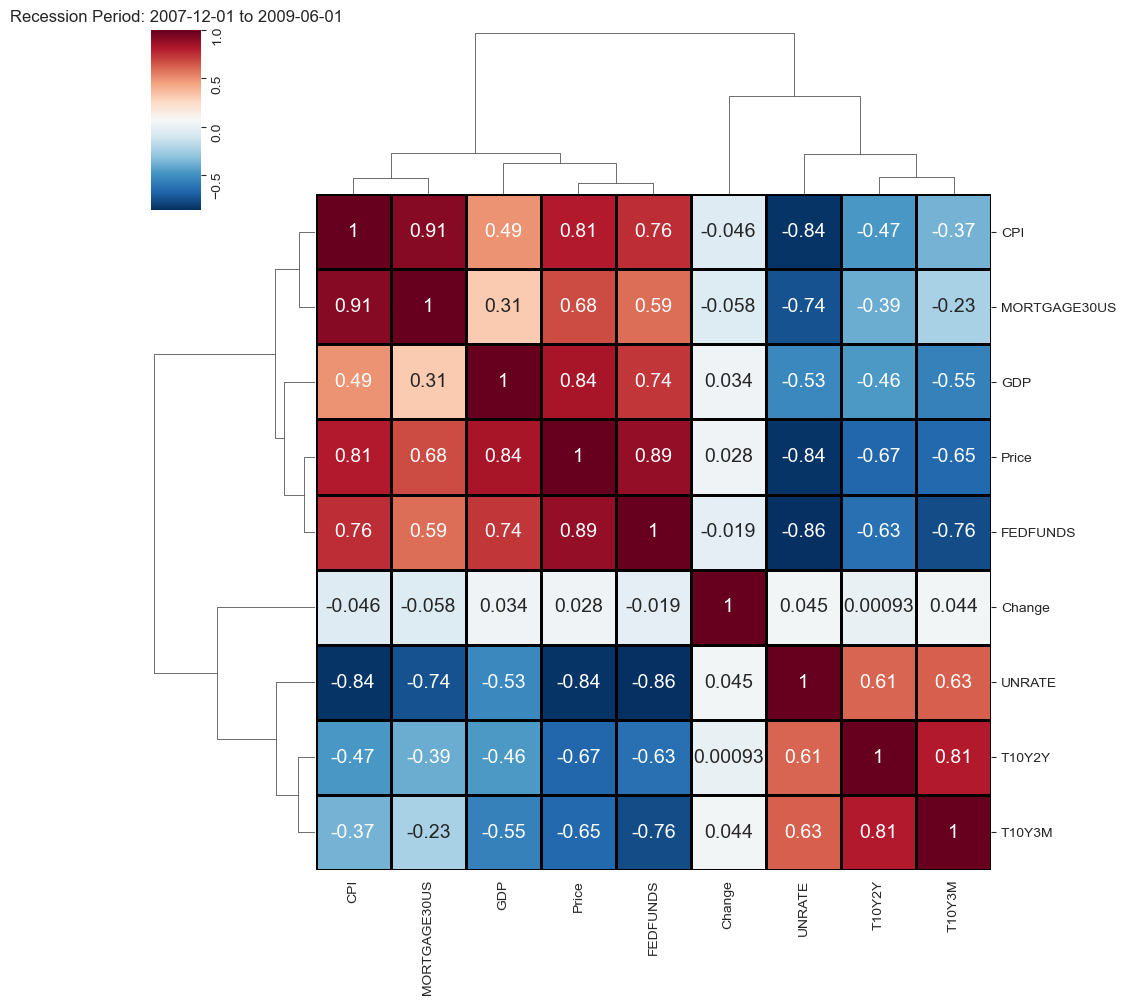

<Figure size 1400x800 with 0 Axes>

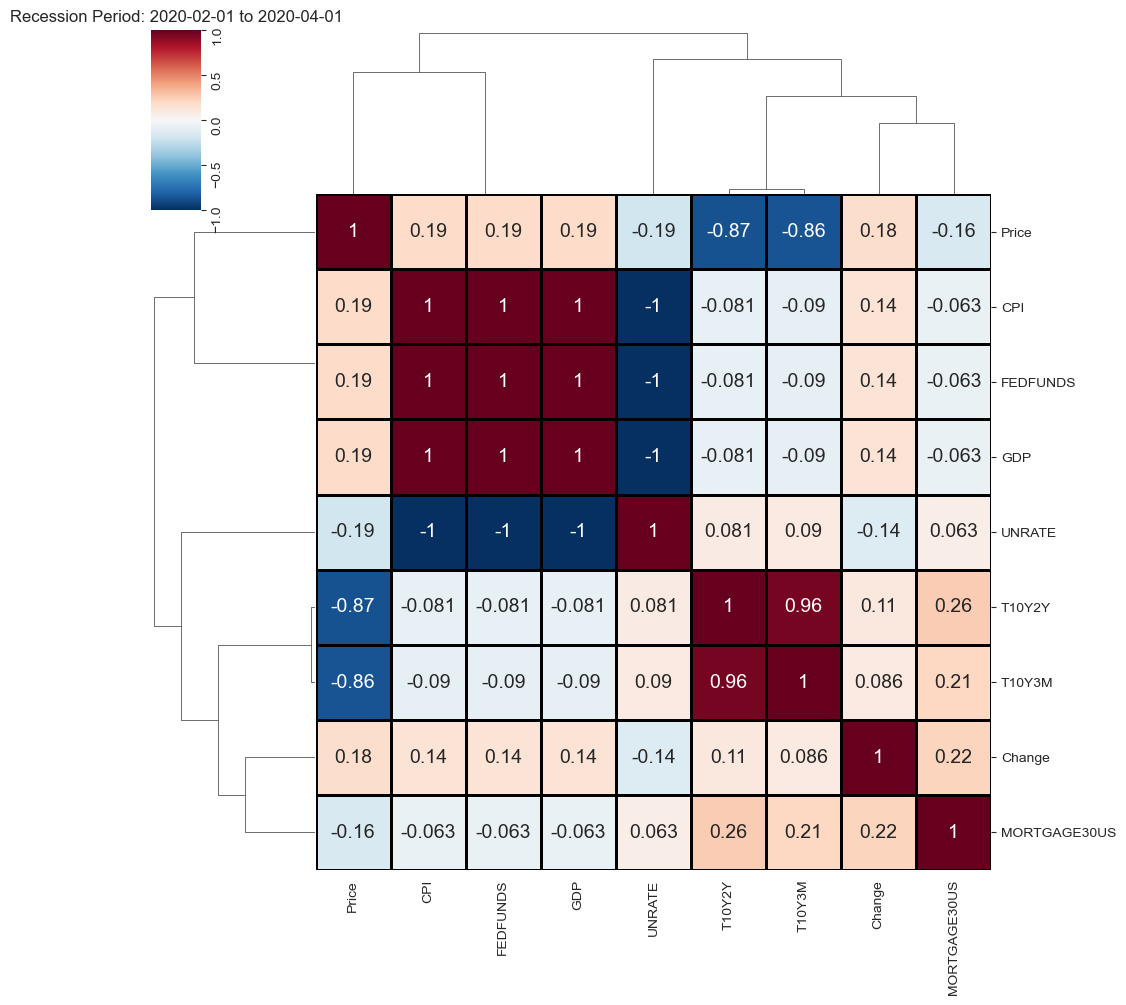

In [27]:
# Assuming 'df' is your DataFrame and 'dates_df' contains recession start and end dates

# Convert 'DATE' column to datetime format in your original DataFrame 'df'
df['DATE'] = pd.to_datetime(df['DATE'])

# Select only the numeric columns for correlation from the entire DataFrame
numeric_df_full = df.select_dtypes(include='number')

# Iterate through each recession period and generate a clustermap
for index, row in dates_df.iterrows():
    start_date = row['Start Dates']
    end_date = row['End Dates']
    
    # Filter the DataFrame to include dates within the recession period
    filtered_df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    numeric_filtered_df = filtered_df.select_dtypes(include='number')
    
    # Fill NaN or infinite values with zeros
    numeric_filtered_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    numeric_filtered_df.fillna(0, inplace=True)
    
    # Generate the correlation matrix based on the filtered data
    corr_matrix = numeric_filtered_df.corr()

    # Replace non-finite values (NaN) in the correlation matrix with zeros
    corr_matrix.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Increase the figure size to make the chart wider
    plt.figure(figsize=(14, 8))

    # Generate the heatmap with correlation values and annotations for each recession period
    sns.clustermap(corr_matrix, annot=True, annot_kws={"fontsize": 14}, 
                   linecolor='black', linewidths=1, cmap='RdBu_r')

    # Set the title for each clustermap based on the recession period
    plt.title(f"Recession Period: {start_date.date()} to {end_date.date()}")

    # Rotate the x-axis tick labels for better readability
    plt.yticks(rotation=90)

    plt.show()

## <span style="color: green;">Correlation between Variables (Focus on T10Y3M)</span>

### <span style="color: red;">T10Y3M Values < 0</span>

In [28]:
# Assuming 'df' is your original DataFrame

# Set the value of 'z' (change this to your desired value)
z = 0  # For values less than 0

# Filter the DataFrame to include rows where 'T10Y3M' values are less than or equal to 'z'
T10Y3M_less_than_0 = df[df['T10Y3M'] <= z].copy()

# Show the resulting DataFrame
T10Y3M_less_than_0

DATE    Price  Change  UNRATE       CPI  FEDFUNDS  GDP  \
0     1979-12-26   107.80  0.0009     NaN       NaN       NaN  NaN   
1     1979-12-27   108.00  0.0019     NaN       NaN       NaN  NaN   
2     1979-12-28   107.80 -0.0019     NaN       NaN       NaN  NaN   
3     1979-12-31   107.90  0.0009     NaN       NaN       NaN  NaN   
4     1980-01-01   107.90  0.0000     6.3  13.86861     13.82  1.3   
...          ...      ...     ...     ...       ...       ...  ...   
11097 2023-12-27  4781.58  0.0014     3.7   3.12092      5.33  2.7   
11098 2023-12-28  4783.35  0.0004     3.7   3.12092      5.33  2.7   
11099 2023-12-29  4769.83 -0.0028     3.7   3.12092      5.33  2.7   
11100 2024-01-02  4742.83 -0.0057     3.7   3.12092      5.33  2.7   
11101 2024-01-03  4704.81 -0.0080     3.7   3.12092      5.33  2.7   

       MORTGAGE30US  T10Y2Y  T10Y3M  
0               NaN   -0.95   -1.52  
1               NaN   -0.93   -1.51  
2             12.90   -0.89   -1.51  
3             12.90   -0.90   -1.71  
4             12.90   -0.90   -1.71  
...             ...     ...     ...  
11097          6.67   -0.41   -1.45  
11098          6.61   -0.42   -1.41  
11099          6.61   -0.35   -1.32  
11100          6.61   -0.38   -1.32  
11101          6.61   -0.38   -1.32  

[1003 rows x 10 columns]

<Figure size 1400x800 with 0 Axes>

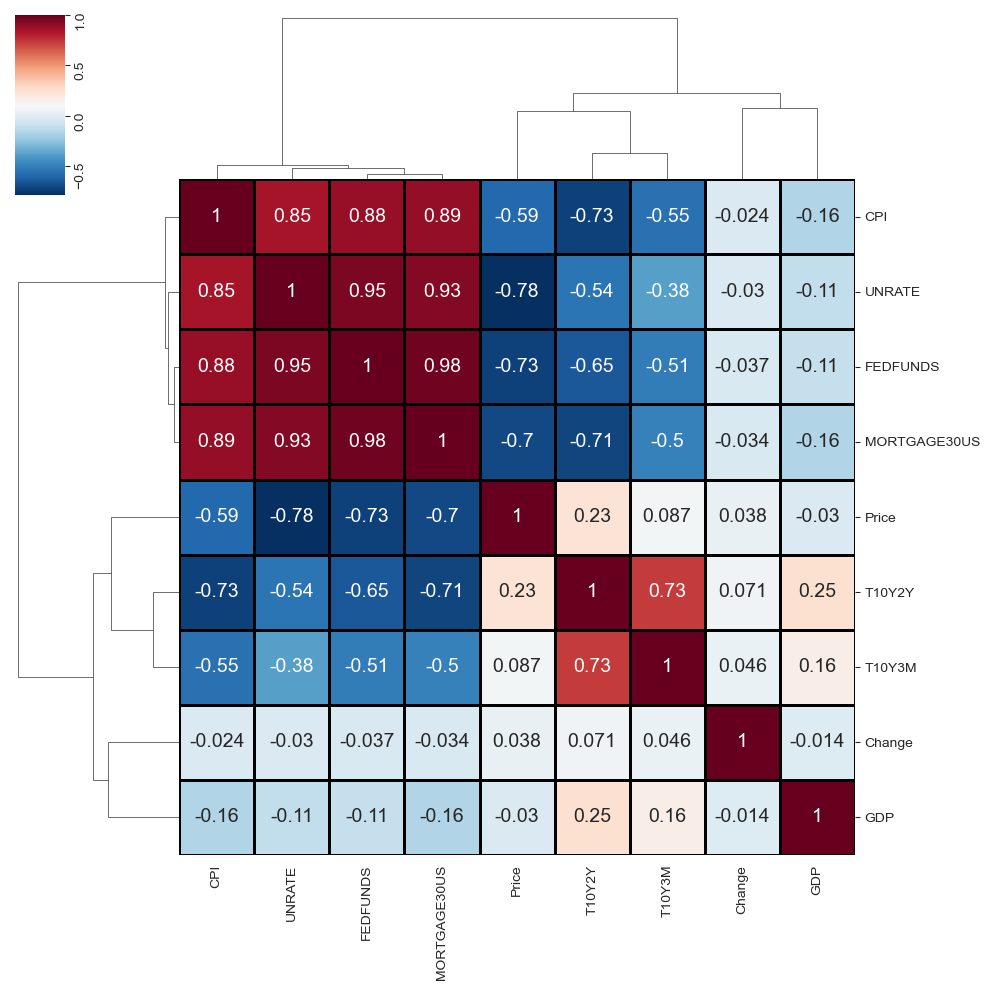

In [29]:
# Assuming 'T10Y3M_less_than_0' is your DataFrame

# Replace infinite values (if any) with NaN
T10Y3M_less_than_0.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select only the numeric columns for correlation
numeric_df = T10Y3M_less_than_0.select_dtypes(include='number')

# Fill NaN values with a specified method (e.g., filling NaN with 0)
numeric_df.fillna(0, inplace=True)  # You can use other methods like mean, median, etc.

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))

# Generate the heatmap with correlation values and annotations
sns.clustermap(corr_matrix, annot=True, annot_kws={"fontsize": 14}, linecolor='black', linewidths=1, cmap='RdBu_r')

# Rotate the x-axis tick labels for better readability
plt.yticks(rotation=90)

plt.show()

### <span style="color: green;">T10Y3M Values > 0</span>

In [30]:
# Assuming 'df' is your original DataFrame

# Set the value of 'z' (change this to your desired value)
z = 0  # For values more than 0

# Filter the DataFrame to include rows where 'T10Y3M' values are more than or equal to 'z'
T10Y3M_more_than_0 = df[df['T10Y3M'] >= z].copy()

# Show the resulting DataFrame
T10Y3M_more_than_0

DATE    Price  Change  UNRATE       CPI  FEDFUNDS  GDP  \
89    1980-04-30   106.30  0.0038     6.9  14.58924     17.61 -8.0   
90    1980-05-01   105.50 -0.0075     7.5  14.42577     10.98 -8.0   
91    1980-05-02   105.60  0.0009     7.5  14.42577     10.98 -8.0   
92    1980-05-05   106.40  0.0076     7.5  14.42577     10.98 -8.0   
93    1980-05-06   106.20 -0.0019     7.5  14.42577     10.98 -8.0   
...          ...      ...     ...     ...       ...       ...  ...   
10810 2022-11-03  3719.89 -0.0106     3.6   7.13535      3.78  2.7   
10811 2022-11-04  3770.55  0.0136     3.6   7.13535      3.78  2.7   
10812 2022-11-07  3806.80  0.0096     3.6   7.13535      3.78  2.7   
10813 2022-11-08  3828.11  0.0056     3.6   7.13535      3.78  2.7   
10814 2022-11-09  3748.57 -0.0208     3.6   7.13535      3.78  2.7   

       MORTGAGE30US  T10Y2Y  T10Y3M  
89            16.25   -0.05    0.37  
90            16.25   -0.13    0.21  
91            15.90    0.20    0.39  
92            15.90    0.33    0.52  
93            15.90    0.40    0.30  
...             ...     ...     ...  
10810          6.95   -0.57    0.08  
10811          6.95   -0.49    0.15  
10812          6.95   -0.50    0.10  
10813          6.95   -0.53    0.04  
10814          6.95   -0.49    0.01  

[10116 rows x 10 columns]

<Figure size 1400x800 with 0 Axes>

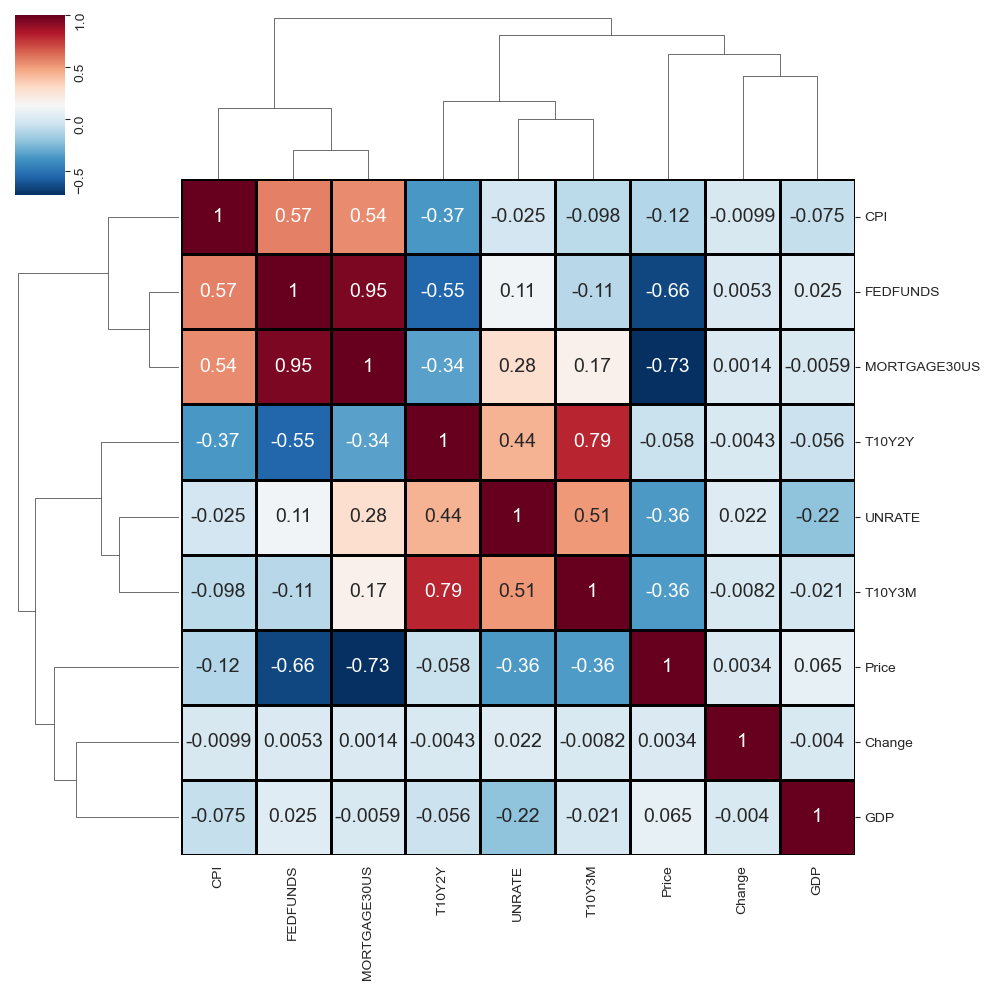

In [31]:
# Assuming 'T10Y3M_more_than_0' is your DataFrame

# Replace infinite values (if any) with NaN
T10Y3M_more_than_0.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select only the numeric columns for correlation
numeric_df = T10Y3M_more_than_0.select_dtypes(include='number')

# Fill NaN values with a specified method (e.g., filling NaN with 0)
numeric_df.fillna(0, inplace=True)  # You can use other methods like mean, median, etc.

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))

# Generate the heatmap with correlation values and annotations
sns.clustermap(corr_matrix, annot=True, annot_kws={"fontsize": 14}, linecolor='black', linewidths=1, cmap='RdBu_r')

# Rotate the x-axis tick labels for better readability
plt.yticks(rotation=90)

plt.show()

## <span style="color: blue;">Non-Recession Dates</span>

In [32]:
non_recesssion = pd.read_excel('non_recession_results.xlsx')
non_recesssion

Start Dates  End Dates
0  1979-12-26 1980-01-01
1  1980-07-01 1981-07-01
2  1982-11-01 1990-07-01
3  1991-03-01 2001-03-01
4  2001-11-01 2007-12-01
5  2009-06-01 2020-02-01
6  2020-04-01 2024-01-06

## <span style="color: green;">Correlation between Variables (Non-Recession Periods)</span>

<Figure size 1400x800 with 0 Axes>

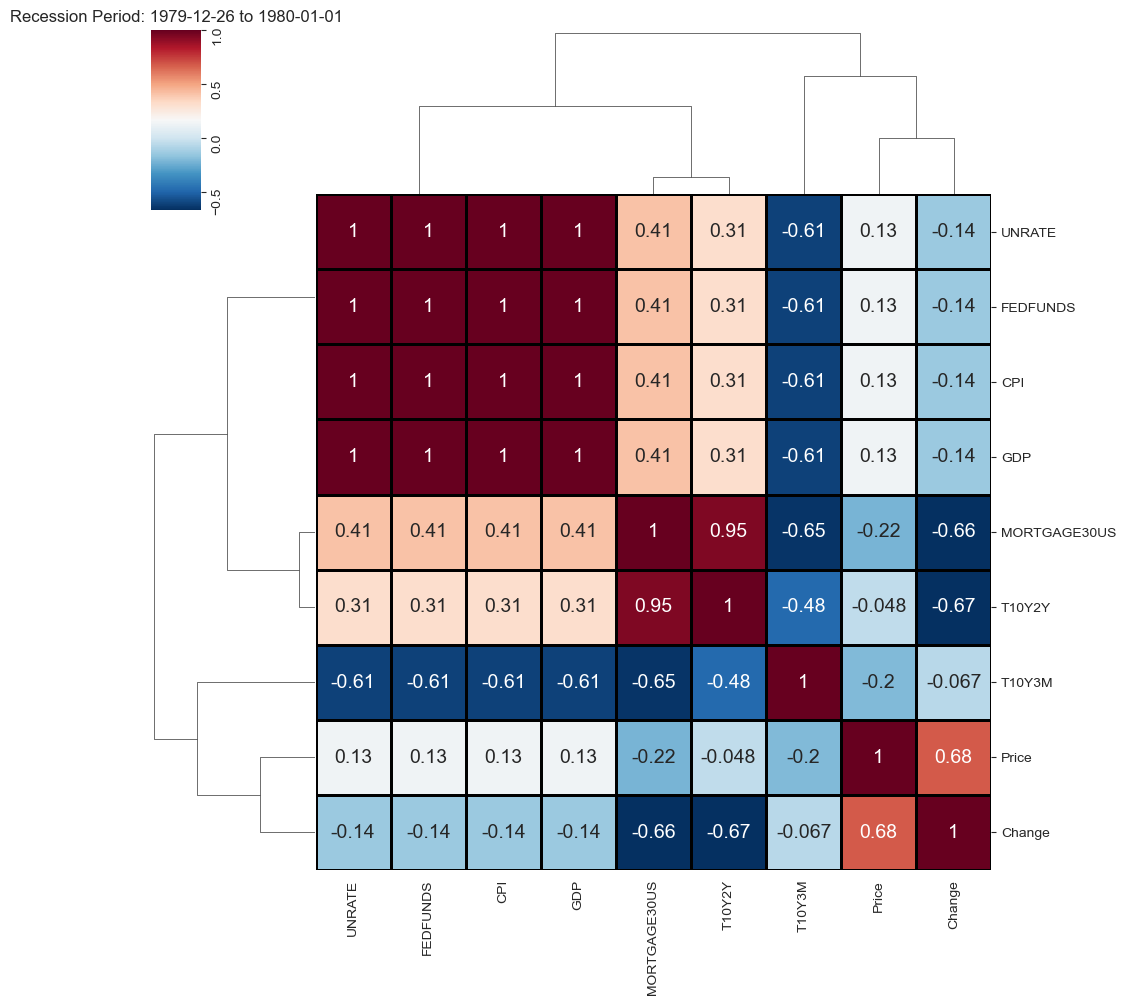

<Figure size 1400x800 with 0 Axes>

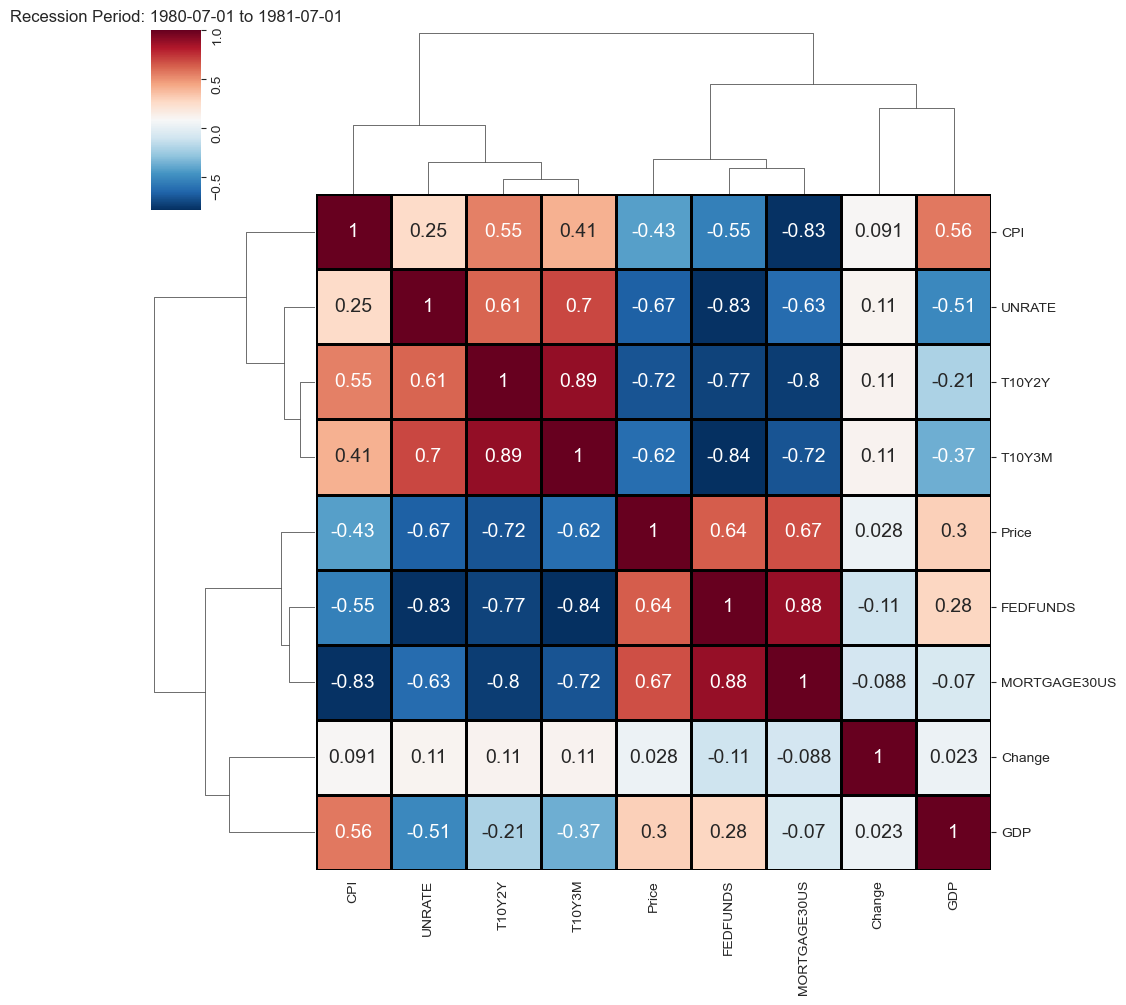

<Figure size 1400x800 with 0 Axes>

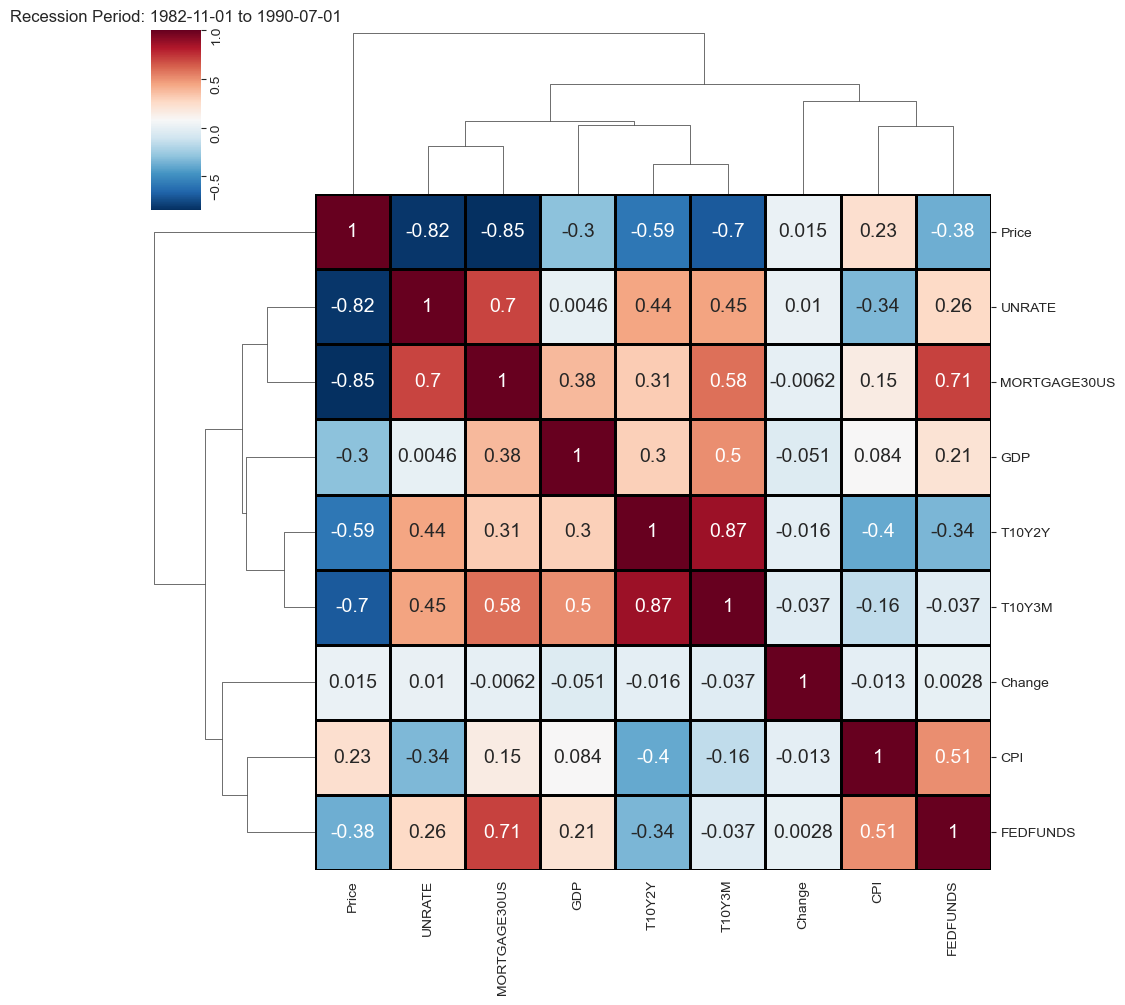

<Figure size 1400x800 with 0 Axes>

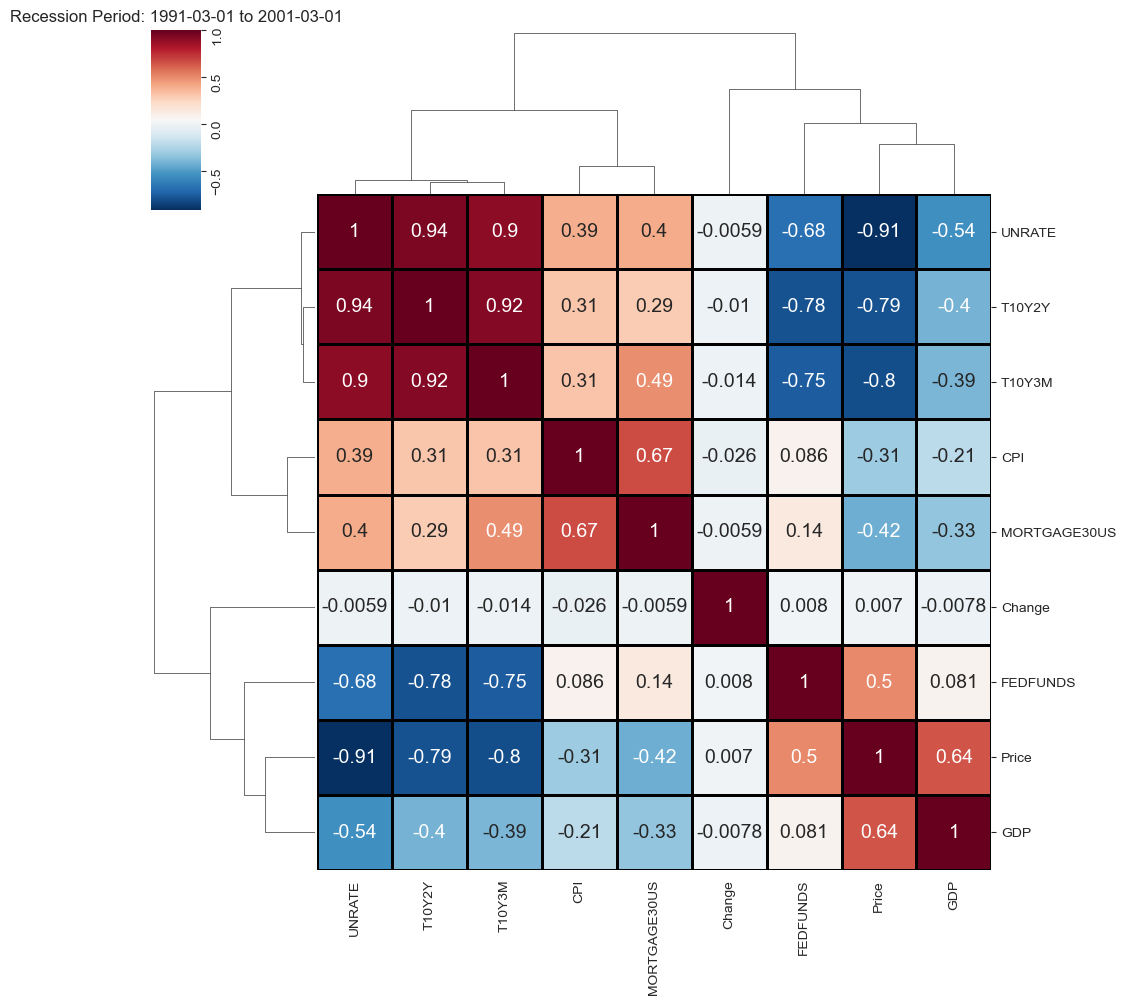

<Figure size 1400x800 with 0 Axes>

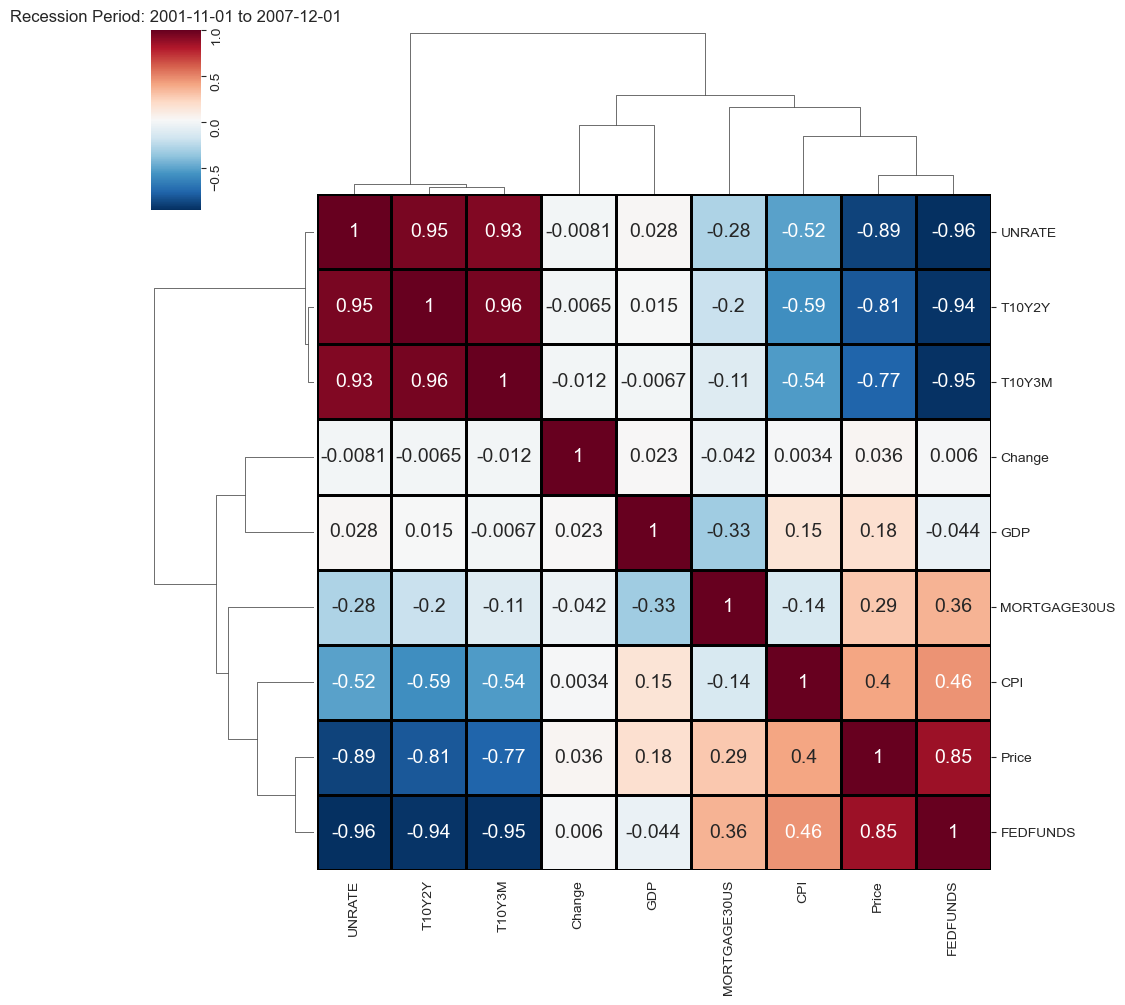

<Figure size 1400x800 with 0 Axes>

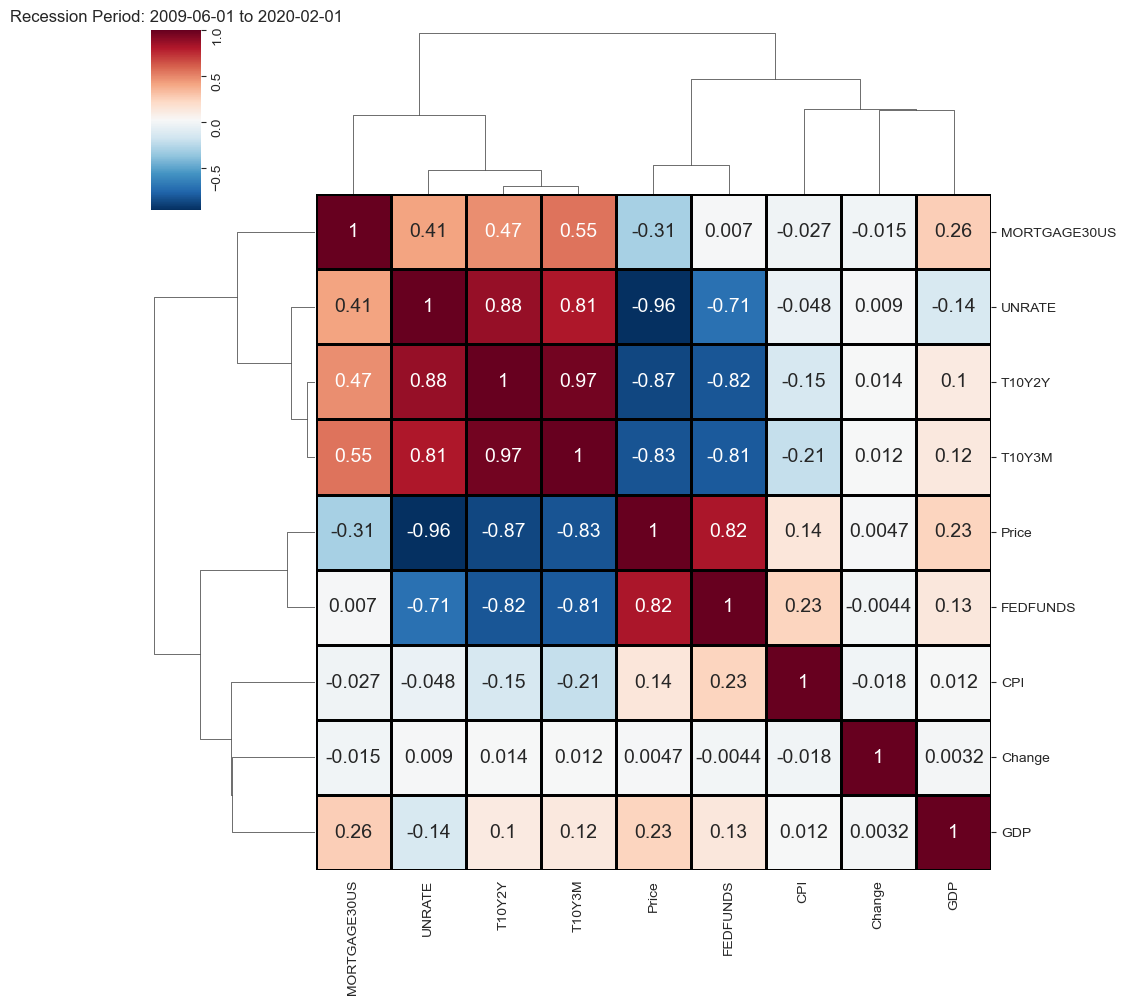

<Figure size 1400x800 with 0 Axes>

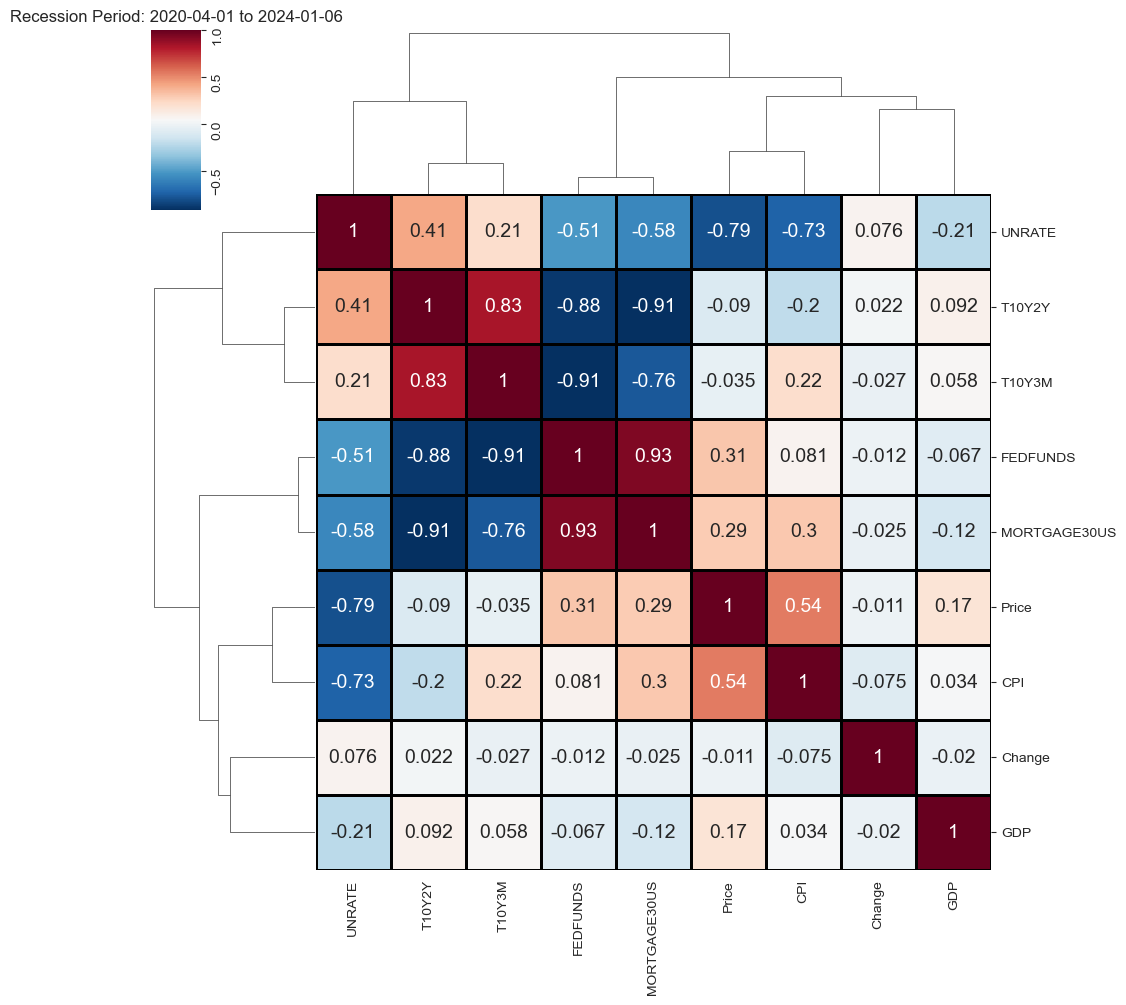

In [33]:
# Assuming 'df' is your DataFrame and 'dates_df' contains recession start and end dates

# Convert 'DATE' column to datetime format in your original DataFrame 'df'
df['DATE'] = pd.to_datetime(df['DATE'])

# Select only the numeric columns for correlation from the entire DataFrame
numeric_df_full = df.select_dtypes(include='number')

# Iterate through each recession period and generate a clustermap
for index, row in non_recesssion.iterrows():
    start_date = row['Start Dates']
    end_date = row['End Dates']
    
    # Filter the DataFrame to include dates within the recession period
    filtered_df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
    numeric_filtered_df = filtered_df.select_dtypes(include='number')
    
    # Fill NaN or infinite values with zeros
    numeric_filtered_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    numeric_filtered_df.fillna(0, inplace=True)
    
    # Generate the correlation matrix based on the filtered data
    corr_matrix = numeric_filtered_df.corr()

    # Replace non-finite values (NaN) in the correlation matrix with zeros
    corr_matrix.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Increase the figure size to make the chart wider
    plt.figure(figsize=(14, 8))

    # Generate the heatmap with correlation values and annotations for each recession period
    sns.clustermap(corr_matrix, annot=True, annot_kws={"fontsize": 14}, 
                   linecolor='black', linewidths=1, cmap='RdBu_r')

    # Set the title for each clustermap based on the recession period
    plt.title(f"Recession Period: {start_date.date()} to {end_date.date()}")

    # Rotate the x-axis tick labels for better readability
    plt.yticks(rotation=90)

    plt.show()

## <span style="color: orange;">Correlation between Variables (Rolling Data - Last 9 Years)</span>

### <span style="color: purple;">Correlation between Variables (Rolling Mean)</span>

In [34]:
# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Select columns for which you want to calculate the rolling mean (excluding 'DATE')
columns_for_rolling_mean = df.columns[df.columns != 'DATE']

# Calculate rolling mean for selected columns with a window of 100 days
rolling_mean_data = df[columns_for_rolling_mean].rolling(window=100).mean()

# Combine 'DATE' column with the rolling mean data
rolling_mean_data['DATE'] = df['DATE']

# Save the rolling mean data (excluding 'DATE' column) to an Excel file
rolling_mean_data.to_excel('rolling_mean_data.xlsx', index=False)

<Figure size 1400x800 with 0 Axes>

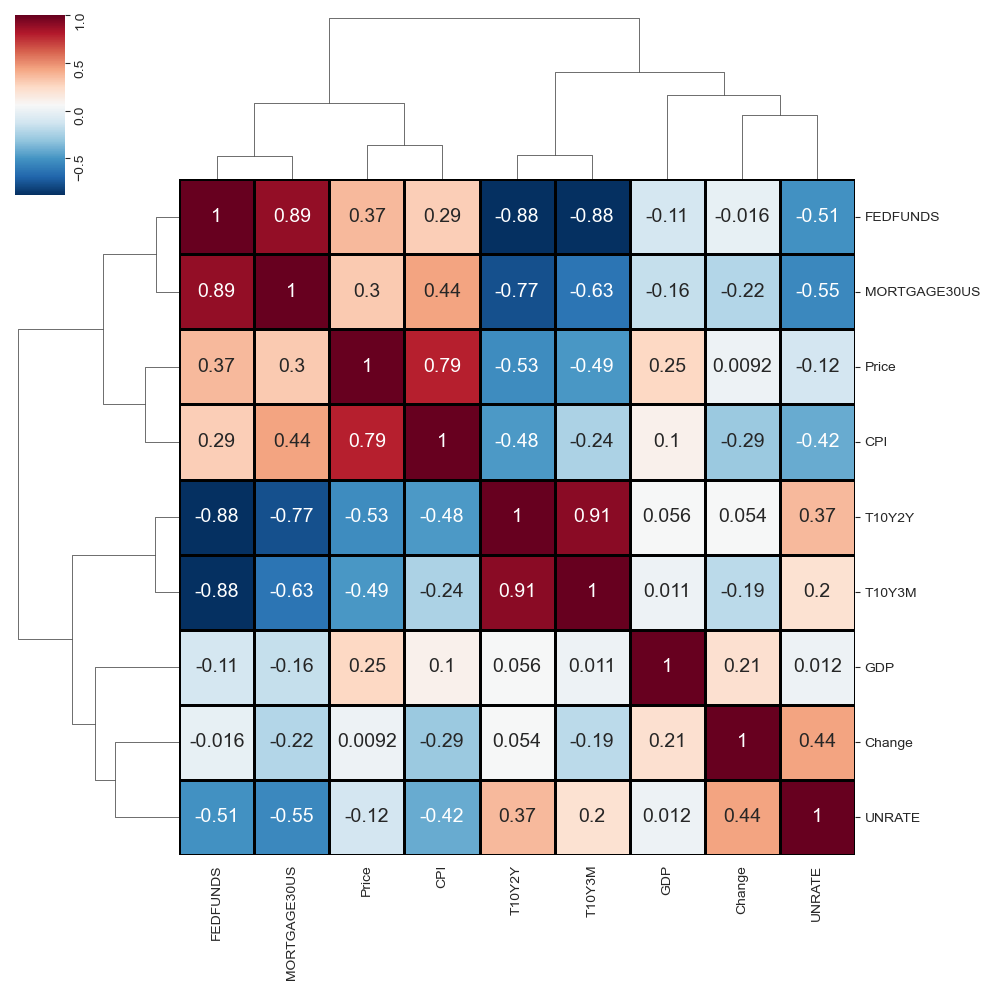

In [35]:
# Assuming 'df' is your DataFrame

# Convert 'DATE' column to datetime format
rolling_mean_data['DATE'] = pd.to_datetime(rolling_mean_data['DATE'])

# Filter the DataFrame to include data from the last 9 years from today's date
current_date = pd.to_datetime('today')
start_date = current_date - pd.DateOffset(years=9)
filtered_rolling_mean_data = rolling_mean_data[rolling_mean_data['DATE'] >= start_date]

# Select only the numeric columns for correlation from the filtered DataFrame
numeric_rolling_mean_data = filtered_rolling_mean_data.select_dtypes(include='number')

# Generate the correlation matrix based on the filtered data
corr_matrix = numeric_rolling_mean_data.corr()

# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))

# Generate the heatmap with correlation values and annotations
sns.clustermap(corr_matrix, annot=True, annot_kws={"fontsize": 14}, linecolor='black', linewidths=1, cmap='RdBu_r')

# Rotate the x-axis tick labels for better readability
plt.yticks(rotation=90)

plt.show()

In [36]:
# Assuming 'df' is your DataFrame

# Step 1: Create independent and dependent variables DataFrames
independent_variables_1 = numeric_rolling_mean_data[['UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M']]
dependent_variable_1 = numeric_rolling_mean_data['Price']

# Step 2: Drop rows with missing values in any of the columns used for regression
df_reg = pd.concat([independent_variables_1, dependent_variable_1], axis=1).dropna()

# Extract independent and dependent variables after dropping missing values
independent_variables_1 = df_reg[['UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M']]
dependent_variable_1 = df_reg['Price']

# Step 3: Add a constant to the independent variables DataFrame
independent_variables_1 = sm.add_constant(independent_variables_1)

# Step 4: Fit the OLS regression model
regression_model_1 = sm.OLS(dependent_variable_1, independent_variables_1).fit()

# Step 5: Print the regression statistics
print(regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     3141.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:11:45   Log-Likelihood:                -16086.
No. Observations:                2257   AIC:                         3.218e+04
Df Residuals:                    2251   BIC:                         3.222e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1993.5097     66.435     30.007      0.0

In [37]:
# Predict values using the regression model
predicted_values_1 = regression_model_1.predict()

# Create a DataFrame containing predicted and actual values
data = {'Predicted': predicted_values_1, 'Actual': dependent_variable_1}
scatter_df_1 = pd.DataFrame(data)

# Create a scatter plot using Plotly
fig_1 = go.Figure()

# Add scatter plot
fig_1.add_trace(go.Scatter(x=scatter_df_1['Predicted'], y=scatter_df_1['Actual'], mode='markers', name='Scatter Plot'))

# Add 45-degree line
fig_1.add_trace(go.Scatter(x=scatter_df_1['Actual'], y=scatter_df_1['Actual'], mode='lines', name='45-degree line'))

# Update layout for better visualization
fig_1.update_traces(marker=dict(size=5, opacity=0.5))  # Adjust marker size and opacity
fig_1.update_layout(title='Predicted vs. Actual Values', xaxis_title='Predicted values', yaxis_title='Actual values')

# Show interactive plot
fig_1.show()

### <span style="color: purple;">Correlation between Variables (Rolling SD)</span>

In [38]:
# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Select columns for which you want to calculate the rolling standard deviation (excluding 'DATE')
columns_for_rolling_sd = df.columns[df.columns != 'DATE']

# Calculate rolling standard deviation for selected columns with a window of 100 days
rolling_sd_data = df[columns_for_rolling_sd].rolling(window=100).std()

# Combine 'DATE' column with the rolling standard deviation data
rolling_sd_data['DATE'] = df['DATE']

# Save the rolling standard deviation data (excluding 'DATE' column) to an Excel file
rolling_sd_data.to_excel('rolling_sd_data.xlsx', index=False)

<Figure size 1400x800 with 0 Axes>

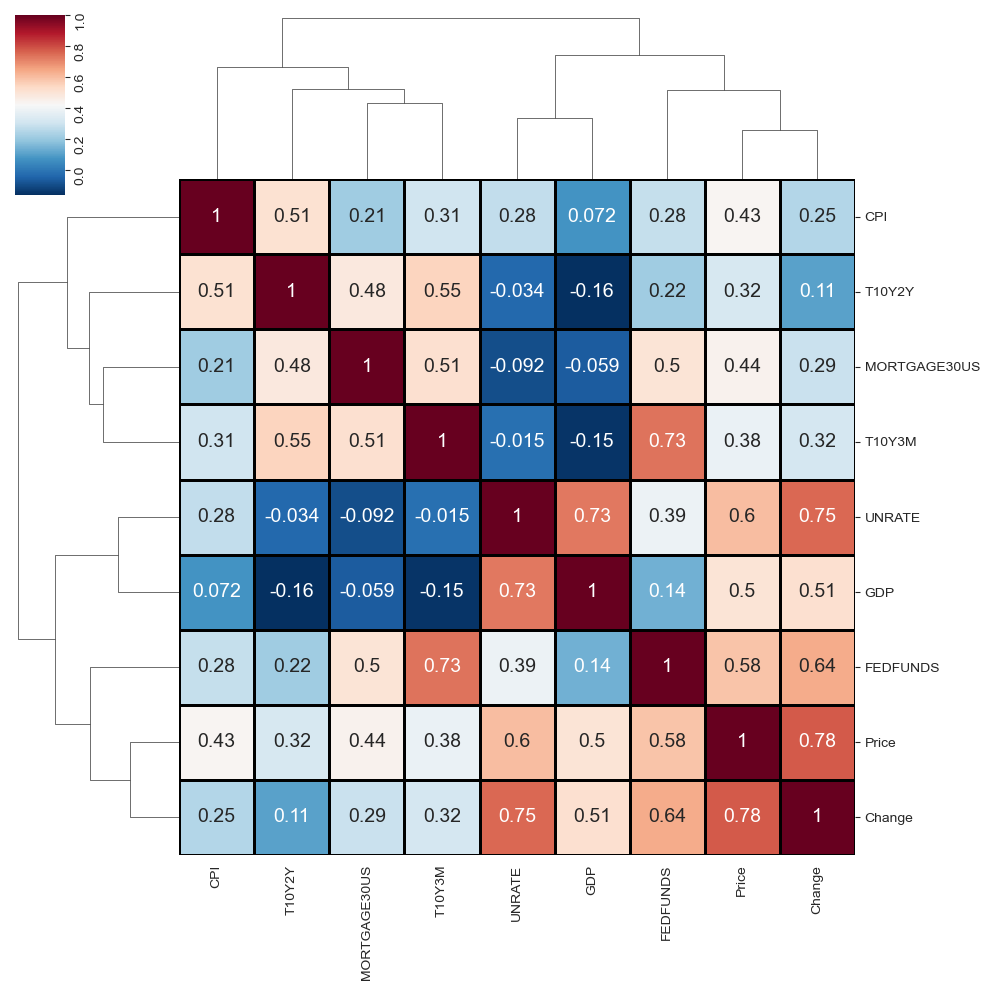

In [39]:
# Assuming 'df' is your DataFrame

# Convert 'DATE' column to datetime format
rolling_sd_data['DATE'] = pd.to_datetime(rolling_sd_data['DATE'])

# Filter the DataFrame to include data from the last 9 years from today's date
current_date = pd.to_datetime('today')
start_date = current_date - pd.DateOffset(years=9)
filtered_rolling_sd_data = rolling_sd_data[rolling_sd_data['DATE'] >= start_date]

# Select only the numeric columns for correlation from the filtered DataFrame
numeric_rolling_sd_data = filtered_rolling_sd_data.select_dtypes(include='number')

# Generate the correlation matrix based on the filtered data
corr_matrix = numeric_rolling_sd_data.corr()

# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))

# Generate the heatmap with correlation values and annotations
sns.clustermap(corr_matrix, annot=True, annot_kws={"fontsize": 14}, linecolor='black', linewidths=1, cmap='RdBu_r')

# Rotate the x-axis tick labels for better readability
plt.yticks(rotation=90)

plt.show()

In [40]:
# Assuming 'df' is your DataFrame

# Step 1: Create independent and dependent variables DataFrames
independent_variables_2 = numeric_rolling_sd_data[['UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M']]
dependent_variable_2 = numeric_rolling_sd_data['Price']

# Step 2: Drop rows with missing values in any of the columns used for regression
df_reg = pd.concat([independent_variables_1, dependent_variable_1], axis=1).dropna()

# Extract independent and dependent variables after dropping missing values
independent_variables_2 = df_reg[['UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M']]
dependent_variable_2 = df_reg['Price']

# Step 3: Add a constant to the independent variables DataFrame
independent_variables_2 = sm.add_constant(independent_variables_2)

# Step 4: Fit the OLS regression model
regression_model_2 = sm.OLS(dependent_variable_1, independent_variables_2).fit()

# Step 5: Print the regression statistics
print(regression_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     3141.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:11:46   Log-Likelihood:                -16086.
No. Observations:                2257   AIC:                         3.218e+04
Df Residuals:                    2251   BIC:                         3.222e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1993.5097     66.435     30.007      0.0

In [41]:
# Predict values using the regression model
predicted_values_2 = regression_model_2.predict()

# Create a DataFrame containing predicted and actual values
data = {'Predicted': predicted_values_2, 'Actual': dependent_variable_2}
scatter_df_2 = pd.DataFrame(data)

# Create a scatter plot using Plotly
fig_2 = go.Figure()

# Add scatter plot
fig_2.add_trace(go.Scatter(x=scatter_df_2['Predicted'], y=scatter_df_2['Actual'], mode='markers', name='Scatter Plot'))

# Add 45-degree line
fig_2.add_trace(go.Scatter(x=scatter_df_2['Actual'], y=scatter_df_2['Actual'], mode='lines', name='45-degree line'))

# Update layout for better visualization
fig_2.update_traces(marker=dict(size=5, opacity=0.5))  # Adjust marker size and opacity
fig_2.update_layout(title='Predicted vs. Actual Values', xaxis_title='Predicted values', yaxis_title='Actual values')

# Show interactive plot
fig_2.show()

In [42]:
# Define the regression results as a dictionary
regression_results_0 = {
    'Variable': ['const', 'UNRATE', 'CPI', 'FEDFUNDS', 'T10Y2Y', 'T10Y3M'],
    'Coefficient': [2020.2840, 90.0922, 377.2898, -80.9212, 1141.0985, -1100.2004],
    'Std Err': [66.269, 6.384, 3.913, 14.279, 33.778, 24.438],
    't-value': [30.486, 14.111, 96.413, -5.667, 33.782, -45.021],
    'P>|t|': [0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
}

# Create a DataFrame from the dictionary
regression_df_0 = pd.DataFrame(regression_results_0)

# Export the DataFrame to an Excel file
regression_df_0.to_excel('rolling_mean_coe_100days.xlsx', index=False)